# Optimización de Hospitales con Algoritmos Genéticos

## Manipulación y Gestión de Datos

In [1]:
import csv
import networkx as nx

In [2]:
# Descarga directo del Drive, no hace falta arrastrar
!wget -c --no-check-certificate "https://drive.google.com/uc?export=download&id=14fasFDYMwteamI9TglSJ4nXtnAfriduE&confirm=t" -O Misiones.zip

--2023-12-15 21:06:19--  https://drive.google.com/uc?export=download&id=14fasFDYMwteamI9TglSJ4nXtnAfriduE&confirm=t
Resolving drive.google.com (drive.google.com)... 142.250.148.139, 142.250.148.113, 142.250.148.101, ...
Connecting to drive.google.com (drive.google.com)|142.250.148.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mn22e2504a1th51nn70onat8s4vpmsg9/1702674375000/12225850433951268217/*/14fasFDYMwteamI9TglSJ4nXtnAfriduE?e=download&uuid=0834a887-ecd6-4222-b23c-f634e88437d6 [following]
--2023-12-15 21:06:20--  https://doc-0k-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mn22e2504a1th51nn70onat8s4vpmsg9/1702674375000/12225850433951268217/*/14fasFDYMwteamI9TglSJ4nXtnAfriduE?e=download&uuid=0834a887-ecd6-4222-b23c-f634e88437d6
Resolving doc-0k-9c-docs.googleusercontent.com (doc-0k-9c-docs.googleusercontent.com)... 64.233.

In [3]:
!unzip Misiones.zip

Archive:  Misiones.zip
  inflating: Conexiones_Misiones.csv  
  inflating: Datos_Misiones.csv      


In [4]:
with open('Datos_Misiones.csv', 'r') as nodecsv:
    nodereader = csv.reader(nodecsv, delimiter=';')
    nodes = [n for n in nodereader][1:] # Usamos slicing para ignorar la primer linea del csv

with open('Conexiones_Misiones.csv', 'r') as edgecsv:
    edgereader = csv.reader(edgecsv, delimiter=';')
    edges = [tuple(e) for e in edgereader][1:]

Con las dos siguientes celdas podemos verificar que los datos se almacenaron correctamente.

In [5]:
print(*nodes, sep='\n')

['Apóstoles', '-27.914322', '-55.754894', '316', '32943', '104.3']
['Aristóbulo del Valle', '-27.095513', '-54.893343', '593', '29003', '48.9']
['Posadas', '-27.404547', '-55.902778', '308', '304765', '989.5']
['Eldorado', '-26.402914', '-54.634779', '216', '76663', '354.9']
['El Soberbio', '-27.296470', '-54.198393', '1783', '27211', '15.3']
['San Vicente', '-26.993509', '-54.487219', '1522', '53800', '35.3']
['Colonia Wanda', '-25.969839', '-54.579370', '481', '19227', '40']
['Puerto Iguazú', '-25.597342', '-54.578280', '766', '58760', '76.7']
['Leandro N. Alem', '-27.604160', '-55.324049', '175', '32551', '186']
['Puerto Rico', '-26.820680', '-55.022551', '124', '21985', '177.3']
['Montecarlo', '-26.571662', '-54.741179', '958', '26901', '28.1']
['Oberá', '-27.485096', '-55.120063', '155', '80121', '516.9']
['San Ignacio', '-27.257574', '-55.535267', '351', '12000', '34.2']
['San Javier', '-27.866305', '-55.137557', '171', '14445', '84.5']
['San Pedro', '-26.625353', '-54.114189', '

In [6]:
print(*edges, sep='\n')

('Apóstoles', 'Posadas', '62')
('Apóstoles', 'Leandro N. Alem', '69')
('Apóstoles', 'San Javier', '74')
('Posadas', 'San Ignacio', '56')
('Posadas', 'Leandro N. Alem', '80')
('San Ignacio', 'Puerto Rico', '75')
('San Ignacio', 'Oberá', '71')
('Leandro N. Alem', 'Oberá', '23')
('Leandro N. Alem', 'San Javier', '42')
('San Javier', 'Veinticinco de Mayo', '97')
('Oberá', 'Aristóbulo del Valle', '58')
('Oberá', 'Veinticinco de Mayo', '65')
('Veinticinco de Mayo', 'El Soberbio', '91')
('Aristóbulo del Valle', 'Puerto Rico', '51')
('Aristóbulo del Valle', 'San Vicente', '46')
('Puerto Rico', 'Montecarlo', '51')
('San Vicente', 'Montecarlo', '88')
('San Vicente', 'El Soberbio', '48')
('San Vicente', 'San Pedro', '63')
('Montecarlo', 'Eldorado', '28')
('Eldorado', 'San Pedro', '99')
('Eldorado', 'Colonia Wanda', '51')
('Colonia Wanda', 'Puerto Iguazú', '49')
('Puerto Iguazú', 'San Pedro', '216')


## Grafo con `Networkx`

In [7]:
# Inicialización del objeto
G = nx.Graph()

In [8]:
# Agregamos los datos obtenidos anteriormente.
for node in nodes:
  G.add_node(node[0], pos=(float(node[2]), float(node[1])), superficie=node[3], poblacion=node[4], densidad=node[5])
for edge in edges:
  G.add_edge(edge[0], edge[1], weight=edge[2])

Imprimimos informacion basica acerca de la red que acabamos de crear.

In [9]:
for n in G.nodes():
  print(n, G.nodes[n]['pos'])

Apóstoles (-55.754894, -27.914322)
Aristóbulo del Valle (-54.893343, -27.095513)
Posadas (-55.902778, -27.404547)
Eldorado (-54.634779, -26.402914)
El Soberbio (-54.198393, -27.29647)
San Vicente (-54.487219, -26.993509)
Colonia Wanda (-54.57937, -25.969839)
Puerto Iguazú (-54.57828, -25.597342)
Leandro N. Alem (-55.324049, -27.60416)
Puerto Rico (-55.022551, -26.82068)
Montecarlo (-54.741179, -26.571662)
Oberá (-55.120063, -27.485096)
San Ignacio (-55.535267, -27.257574)
San Javier (-55.137557, -27.866305)
San Pedro (-54.114189, -26.625353)
Veinticinco de Mayo (-54.752081, -27.370991)


Para graficar el grafo el metodo `draw()` que nos provee la libreria `Networkx` necesita de un parametro del tipo diccionario con las posiciones de los nodos. Una vez creado este parametro graficamos el grafo.

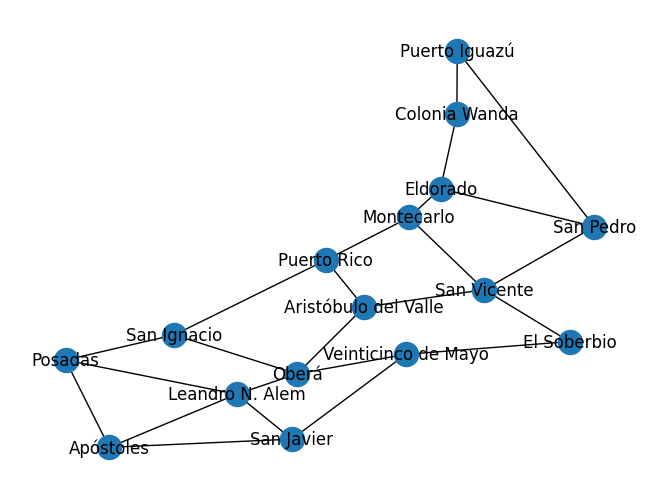

In [10]:
posDict = {}
for n in G.nodes():
  posDict[n] = G.nodes[n]['pos']
nx.draw(G, pos=posDict, with_labels=True)

## Optimización de la Ubicación de los Hospitales

In [11]:
!pip install deap
from deap import base, creator, tools, algorithms
import random
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.5 MB/s eta 0:00:00


In [35]:
IND_SIZE = 9                    # Cantidad de hospitales
X_MIN, X_MAX = -56.0, -54.0     # Límites escuetos para la provincia
Y_MIN, Y_MAX = -28.0, -25.5     # Límites escuetos para la provincia
RADIO_HOSPITAL = .75             # Distancia minima entre hospitales

In [24]:
def distancia(x1, y1, x2, y2):
    """
    Definimos una función que nos permite calcular la distancia entre dos puntos.
    """
    return ((x2 - x1)**2 + (y2 - y1)**2)**0.5

In [36]:
def evaluate(i):
    """
    Lo mismo de siempre, en la función que se evalúa cada individuo...
    puedo programar todos los límites de mi problema.
    """

    fitness = 0.
    for j in range(0,IND_SIZE*2,2):
    # Zona prohibida
        if (-1.8 * i[j] + 1.31 * i[j+1]) > 64.73:
            fitness =- 1_000_000 # Penalizacion fuerte, fuera de la provincia

    # Proximidad a otros hospitales
        for k in range(0,IND_SIZE*2,2):
            if distancia(i[j], i[j+1], i[k], i[k+1]) < RADIO_HOSPITAL and j != k:
                fitness =- 1000 # Penalizacion debil, hospitales cercanos
                break
        for n in G.nodes():
            fitness += (1.0/(1.0 + distancia(i[j], i[j+1], G.nodes[n]['pos'][0], G.nodes[n]['pos'][1]))) * float(G.nodes[n]['poblacion'])
    return fitness,



In [38]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,)) # positivo -> busco maximizar fitness
creator.create("Individual", list, fitness=creator.FitnessMax)

In [28]:
toolbox = base.Toolbox()
toolbox.register("x", random.uniform, X_MIN, X_MAX)
toolbox.register("y", random.uniform, Y_MIN, Y_MAX)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.x, toolbox.y), n=IND_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [39]:
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

In [40]:
N_POP, CXPB, MUTPB, NGEN = 1000, 0.3, 0.7, 100
pop = toolbox.population(n=N_POP)
hof = tools.HallOfFame(10)

In [41]:
# Estadisticas a almacenar de las generaciones
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
logbook = tools.Logbook()   # Para almacenar todas las estadísticas calculadas por generación en un solo objeto.

# Evaluación sencilla del AG
best, logbook = algorithms.eaSimple(pop, toolbox, CXPB, MUTPB, NGEN, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg   	std   	min    	max        
0  	1000  	408743	245076	-700599	1.32833e+06
1  	802   	496415	247856	-803419	1.55091e+06
2  	789   	580783	296894	-777086	1.64715e+06
3  	779   	678061	325750	-810467	2.37259e+06
4  	798   	769052	350148	-855226	2.37259e+06
5  	778   	864000	381930	-765302	2.07214e+06
6  	796   	927324	433689	-802090	2.08432e+06
7  	776   	1.00115e+06	470892	-804060	2.12069e+06
8  	788   	1.07369e+06	512033	-751767	2.22898e+06
9  	762   	1.14406e+06	552448	-804611	2.4055e+06 
10 	760   	1.22784e+06	585752	-754716	2.48358e+06
11 	770   	1.27517e+06	612997	-783341	2.48358e+06
12 	805   	1.27958e+06	660840	-827196	2.48358e+06
13 	798   	1.35492e+06	642899	-740194	2.49683e+06
14 	773   	1.41123e+06	693285	-777103	2.49683e+06
15 	792   	1.44038e+06	686335	-801246	2.48194e+06
16 	788   	1.44963e+06	716424	-793763	2.59692e+06
17 	788   	1.46303e+06	731162	-852947	2.57019e+06
18 	780   	1.48597e+06	733548	-776502	2.59959e+06
19 	801   	1.4619e+06 	750225	-768660	2.

## Representación simple de resultados

In [42]:
print("Mejor fitness: ", hof[0].fitness.values)
print("Mejor individuo: ", hof[0])

Mejor fitness:  (3666060.678372301,)
Mejor individuo:  [-55.14024643161442, -28.379662378780168, -54.22123447839817, -25.254820276332133, -55.22572635635099, -26.735153592336363, -53.86085561771608, -26.38143001124148, -55.8580642742458, -27.43254330167724, -54.581416715962504, -26.144044694639117, -56.360766945775445, -28.064212298212336, -54.41308401277031, -27.071500159348915, -54.99857908722402, -27.62911711679657]


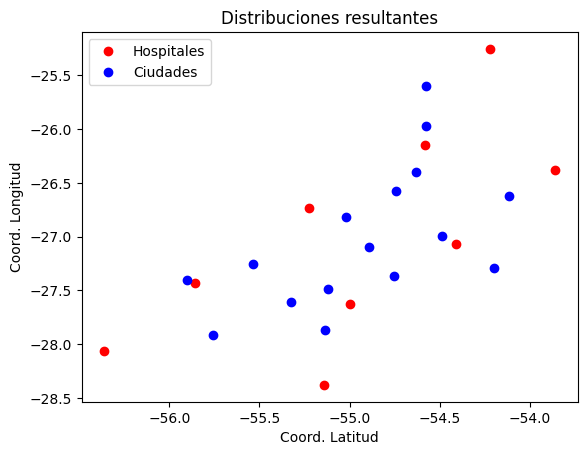

In [43]:
x_hospitales, y_hospitales = [], []
for i in range(0,18,2):
  x_hospitales.append(hof[0][i])
  y_hospitales.append(hof[0][i+1])

x_ciudades, y_ciudades = [], []
for n in G.nodes():
  x_ciudades.append(G.nodes[n]['pos'][0])
  y_ciudades.append(G.nodes[n]['pos'][1])

import matplotlib.pyplot as plt
plt.plot(x_hospitales, y_hospitales, 'ro')
plt.plot(x_ciudades, y_ciudades, 'bo')
plt.title("Distribuciones resultantes")
plt.xlabel("Coord. Latitud")
plt.ylabel("Coord. Longitud")
plt.legend(["Hospitales", "Ciudades"])

## Representación "un tanto mejor" de los Resultados

In [44]:
import folium       # Librería para mapas

mapa = folium.Map(location=[-26.7952403,-54.4926572], zoom_start = 7.5)

for i in range(len(x_hospitales)):
    # Inserto marcadores en las coordenadas de los hospitales
    folium.Marker([y_hospitales[i], x_hospitales[i]], popup = f"Hospital {i+1}").add_to(mapa)

mapa

# Referencias y Recursos



1.   https://networkx.org/
2.   https://python-visualization.github.io/folium/

